In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
# algo nd estimators
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [7]:
df = pd.read_csv('../../datasets/Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [8]:
X = df[['Level']]
Y = df['Salary']

In [11]:
pf = PolynomialFeatures(degree=2)
pX = pf.fit_transform(X)
pX

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [13]:
pX.shape , Y.shape

((10, 3), (10,))

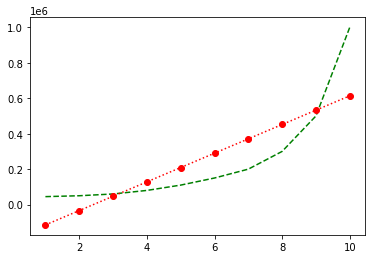

In [18]:
model_1 = LinearRegression()                
model_1.fit(X,Y)
ypred = model_1.predict(X)
plt.plot(X, Y, 'g--')
plt.plot(X, ypred, 'ro:')
plt.show()

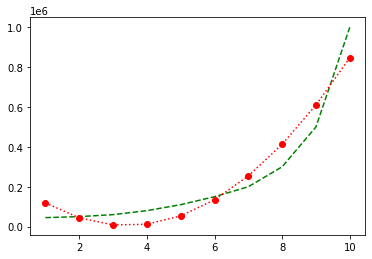

In [19]:
pf = PolynomialFeatures(degree=2)
pX = pf.fit_transform(X)
model_2 = LinearRegression()
model_2.fit(pX,Y)
ypred = model_2.predict(pX)
plt.plot(X, Y, 'g--')
plt.plot(X, ypred, 'ro:')
plt.show()

98.12097727913367


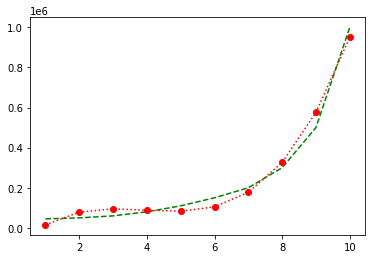

In [22]:
pf = PolynomialFeatures(degree=3)
pX = pf.fit_transform(X)
model_3 = LinearRegression()
model_3.fit(pX,Y)
ypred = model_3.predict(pX)
print(model_3.score(pX,Y)*100)
plt.plot(X, Y, 'g--')
plt.plot(X, ypred, 'ro:')
plt.show()

99.73922891706614


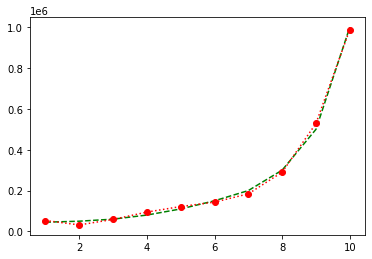

In [34]:
pf = PolynomialFeatures(degree=4)  # we will use this model
pX = pf.fit_transform(X)
model_4 = LinearRegression()
model_4.fit(pX,Y)
ypred = model_4.predict(pX)
print(model_4.score(pX,Y)*100)
plt.plot(X, Y, 'g--')
plt.plot(X, ypred, 'ro:')
plt.show()

99.99999999999999


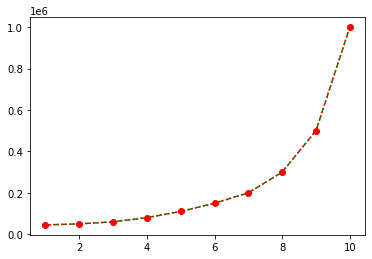

In [33]:
pf = PolynomialFeatures(degree=14)  # we dont preform prediction with 100 % score so we will not use this model
pX = pf.fit_transform(X)
model_14 = LinearRegression()
model_14.fit(pX,Y)
ypred = model_14.predict(pX)
print(model_14.score(pX,Y)*100)
plt.plot(X, Y, 'g--')
plt.plot(X, ypred, 'ro:')
plt.show()

In [31]:
df['Predict-Salary'] = ypred

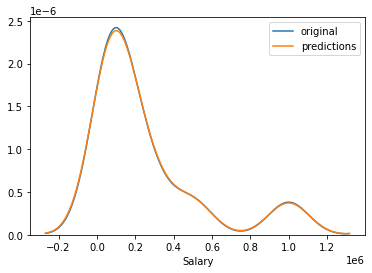

In [29]:
sns.distplot(Y,hist=False,label='original')
sns.distplot(ypred, hist=False,label='predictions')
plt.legend()
plt.show()

In [35]:
import pickle

In [36]:
def save_model(path,model_4):
    with open(path,'wb') as f:
        pickle.dump(model_4,f)
    return path    

In [37]:
save_model('../../models/ploynomial_regression.pkl',model_4)

'../../models/ploynomial_regression.pkl'

In [38]:
model_4.intercept_

184166.66666719737

In [39]:
model_4.coef_

array([      0.        , -211002.33100292,   94765.44289063,
        -15463.28671331,     890.15151515])